In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
base_model = VGG19(include_top=False, weights = "imagenet",
                   input_shape = (32,32,3))



In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation=("relu")))
model.add(Dropout(0.5))
model.add(Dense(10,activation=("softmax")))

          

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                                 
Total params: 20,158,282
Trainable params: 133,898
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/50
782/782 [==============================] - 14s 17ms/step - loss: 1.2318 - accuracy: 0.5663 - val_loss: 1.1900 - val_accuracy: 0.5806 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 14s 17ms/step - loss: 1.2142 - accuracy: 0.5736 - val_loss: 1.2047 - val_accuracy: 0.5760 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 14s 18ms/step - loss: 1.1973 - accuracy: 0.5799 - val_loss: 1.1763 - val_accuracy: 0.5835 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 1.1845 - accuracy: 0.5840 - val_loss: 1.1635 - val_accuracy: 0.5902 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 13s 17ms/step - loss: 1.1677 - accuracy: 0.5891 - val_loss: 1.1745 - val_accuracy: 0.5877 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 13s 17ms/step - loss: 1.1585 - accuracy: 0.5926 - val_loss: 1.1531 - val_accuracy: 0.5956 - lr: 0.0010
Epoch 7/50
782/782 [==============================] - 13s 

In [ ]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

<Axes: >

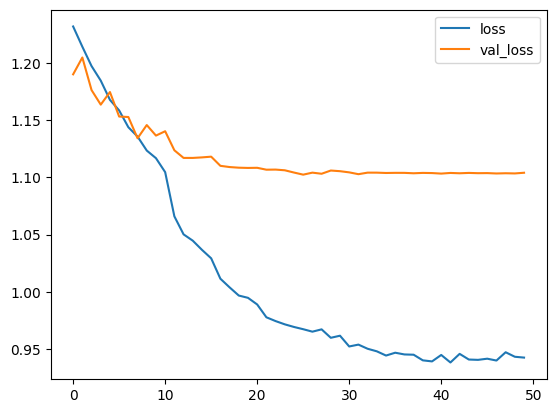

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

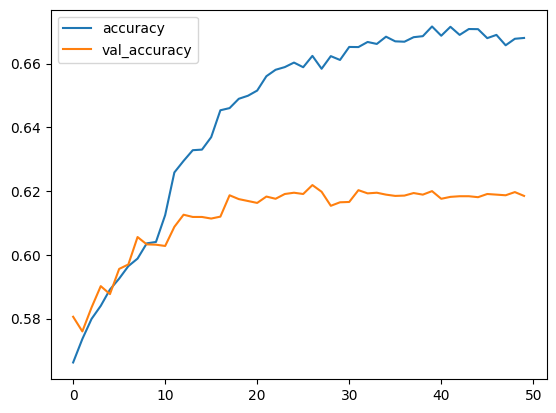

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np

In [ ]:
x_test_predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 9ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))


[[706  26  48  24  20  11  14  16 100  35]
 [ 33 685  16  29  13  18  23  12  50 121]
 [ 63  21 501  78  92  69 100  31  25  20]
 [ 22  49  64 470  58 145  88  35  23  46]
 [ 22  15  76  77 535  42  94  94  29  16]
 [ 14  27  57 172  56 513  61  66   7  27]
 [ 10  22  56  53  65  43 713  11  14  13]
 [ 19  16  50  45  70  62  26 662   7  43]
 [ 79  60  23  18  13   3  10  10 734  50]
 [ 40 133   9  34   8  18  17  32  43 666]]


In [ ]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1000
           1       0.65      0.69      0.67      1000
           2       0.56      0.50      0.53      1000
           3       0.47      0.47      0.47      1000
           4       0.58      0.54      0.55      1000
           5       0.56      0.51      0.53      1000
           6       0.62      0.71      0.66      1000
           7       0.68      0.66      0.67      1000
           8       0.71      0.73      0.72      1000
           9       0.64      0.67      0.65      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

